In [152]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import random
import itertools
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn import metrics

## PROBLEM 1

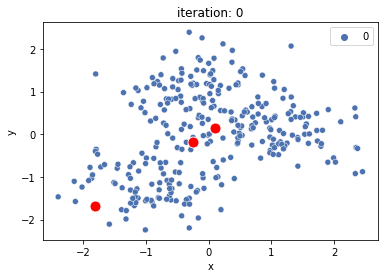

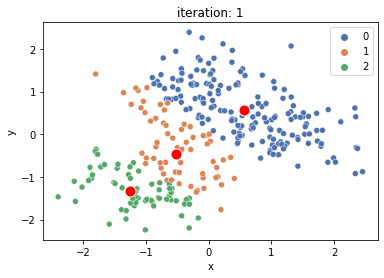

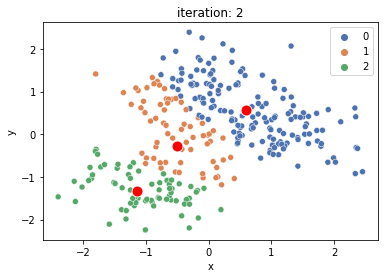

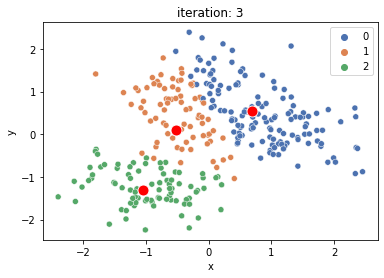

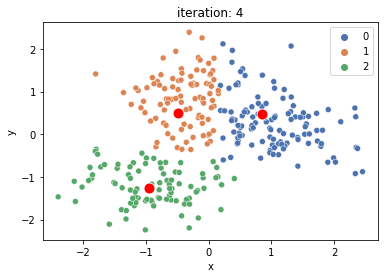

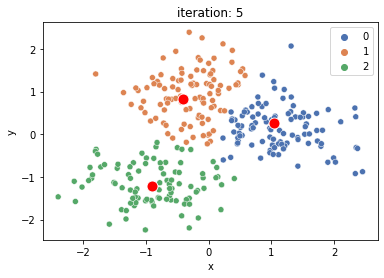

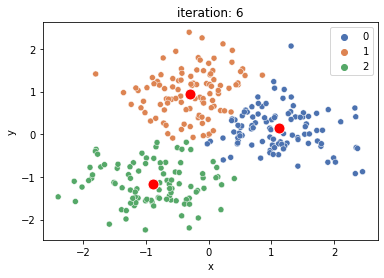

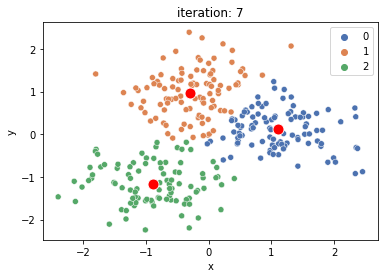

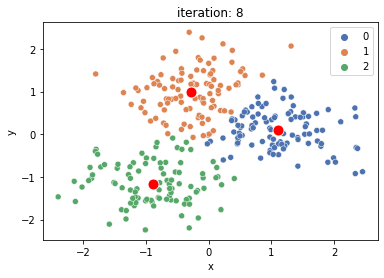

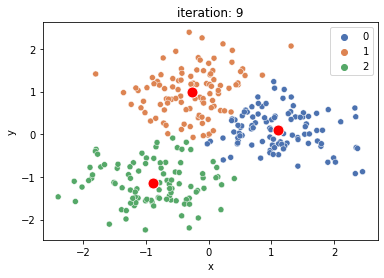

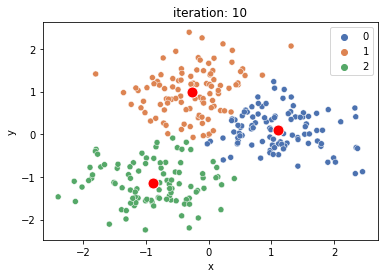

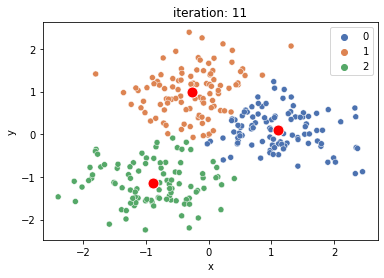

In [101]:
## generating random data points ##

features, true_labels = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=4,
    random_state=42
)

## standardizing the data ##

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## creating a 3 random inital centroids within the data range ##

min_coord, max_coord = np.min(scaled_features, axis=0), np.max(scaled_features, axis=0)
centroids = [random.uniform(min_coord,max_coord) for i in range(3)]
centroids = np.concatenate([[centroids[0]],[centroids[1]],[centroids[2]]])

centroid_list=[centroids]
cluster_labels=[itertools.repeat(0,300)]

## looping through the kmeans algorithm and storing each iteration of centroids ##
## once the centroid has not moved from the previous centroid location the loop breaks ##

for i in range(100):

    kmeans = KMeans(
        init=centroids,
        n_clusters=3,
        n_init=1,
        max_iter=1,
        random_state=42
    )

    kmeans.fit(scaled_features)
    centroids = kmeans.cluster_centers_
    centroid_list.append(centroids)
    cluster_labels.append(kmeans.labels_)

    if np.all(centroid_list[i] == centroid_list[i-1]):
        break

## plotting the iterations of clustering ##

x, y = scaled_features.T

for i in range(len(centroid_list)):

    m,n = centroid_list[i].T
    sns.scatterplot(x=x,y=y, hue = (cluster_labels[i]), palette="deep")
    sns.scatterplot(x=m,y=n, color="red", s= 120)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('iteration: '+str(i))
    plt.show()

## PROBLEM 2

In [105]:
iris = datasets.load_iris()

x_iris = iris.data
y_iris = iris.target

sse=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

c:\Users\liwtt\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


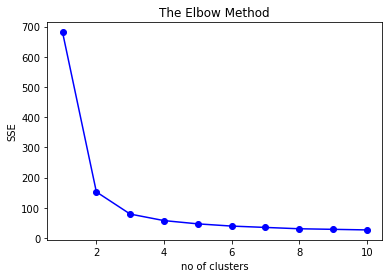

optimal cluster number: 3


In [133]:
plt.plot(range(1,max_k), wcss, 'bo-')
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('SSE')
plt.show()

kl = KneeLocator(
    range(1,11), sse, curve="convex", direction='decreasing')
print("optimal cluster number:", kl.elbow)

Text(0.5, 1.0, 'kmeans with help of elbow method')

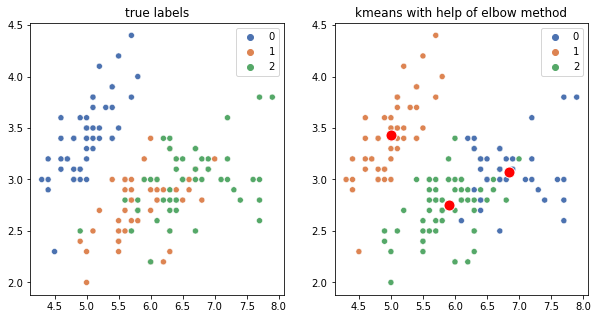

In [149]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

x_data = x_iris[:,0]
y_data = x_iris[:,1]

figure, axes = plt.subplots(1,2, sharex=True, figsize=(10,5))

fig1 = sns.scatterplot(x = x_data, y = y_data, hue = y_iris, palette="deep", ax=axes[0])
fig1.set_title('true labels')
fig2 = sns.scatterplot(x = x_data, y = y_data, hue = kmeans.labels_, palette="deep", ax=axes[1])
fig2 = sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1], color="red", s= 120)
fig2.set_title('kmeans with help of elbow method')


In [195]:
db = DBSCAN(eps=0.5, min_samples=4).fit(x_iris)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_iris, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_iris, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_iris, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_iris, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_iris, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x_iris, labels))

Estimated number of clusters: 3
Estimated number of noise points: 13
Homogeneity: 0.593
Completeness: 0.652
V-measure: 0.621
Adjusted Rand Index: 0.526
Adjusted Mutual Information: 0.613
Silhouette Coefficient: 0.381


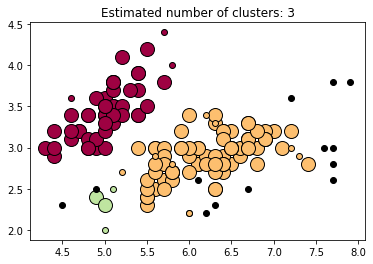

In [196]:
## Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = x_iris[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = x_iris[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()